##Code to generate and save Gaussian test data for PULearning validation

In [15]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
#define constants

num_positive = 5000 #positive data
num_negative = 5000 # negative data
fractionOfPositives_labeled = 0.2 
fractionOfNegatives_labeled = 0.2 

#define Gaussians mean and covariance matrices

Gaussian1_mean = [0,0]
Gaussian2_mean = [1,1]

Gaussian1_cov = [[1, 0.5], [0.5, 1]]
Gaussian2_cov = [[1, -0.5], [-0.5, 1]]

#random generated data
positive_data = np.random.multivariate_normal(Gaussian1_mean,Gaussian1_cov,num_positive)
negative_data = np.random.multivariate_normal(Gaussian2_mean,Gaussian2_cov,num_negative)

positive_data_quadraticTerms = np.square(positive_data)
negative_data_quadraticTerms = np.square(negative_data)

positiveData_features = np.column_stack((positive_data, positive_data_quadraticTerms))
negativeData_features = np.column_stack((negative_data, negative_data_quadraticTerms))

In [17]:
features = np.vstack((positiveData_features,negativeData_features))
num_positive_labels = math.trunc(num_positive*fractionOfPositives_labeled)
num_negative_labels = math.trunc(num_negative*fractionOfNegatives_labeled)
label = [1]*num_positive_labels + [0]*(num_positive-num_positive_labels)+ [0]*(num_negative-num_negative_labels) + [-1]*num_negative_labels

In [18]:
data = np.column_stack((label, features))
np.random.shuffle(data)

In [19]:
df = pd.DataFrame(data, columns=['label','x','y', 'x**2', 'y**2'])

In [20]:
df.head(10)

,label,x,y,x**2,y**2
0,-1,0.138901,1.067257,0.019294,1.139038
1,0,1.356910,2.212229,1.841205,4.893957
2,1,0.322084,0.172259,0.103738,0.029673
3,0,-0.017633,0.071693,0.000311,0.005140
4,0,0.738554,2.255003,0.545462,5.085037
5,0,0.097886,1.153385,0.009582,1.330296
6,1,0.077896,0.173753,0.006068,0.030190
7,-1,0.545868,0.385570,0.297972,0.148665
8,1,1.247133,0.471998,1.555341,0.222782
9,0,-0.066048,0.972567,0.004362,0.945886


In [21]:
df.to_csv("../data/test_Gaussians_formatted.csv")

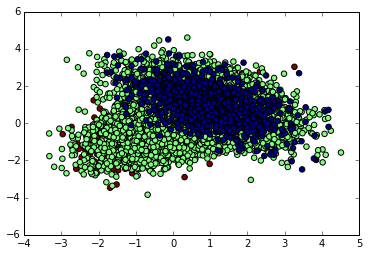

In [22]:
plt.figure()
plt.scatter(features[:, 0], features[:, 1], s=30, c=label)
plt.show()